## Code for the box plots, the distribution of CGPA and the distribution of number of courses 

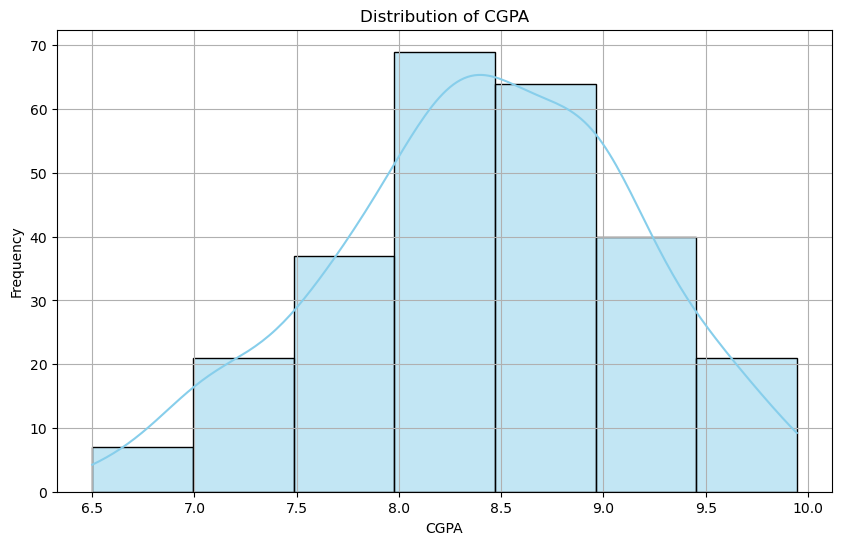

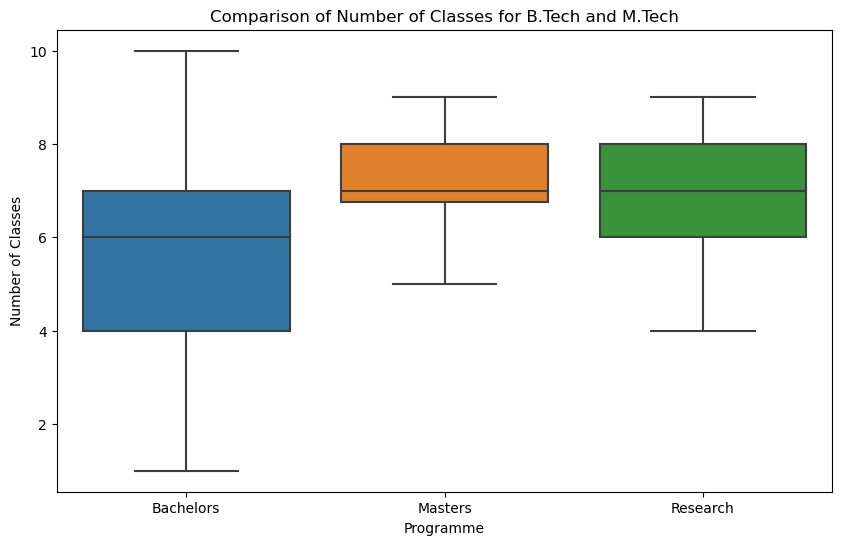

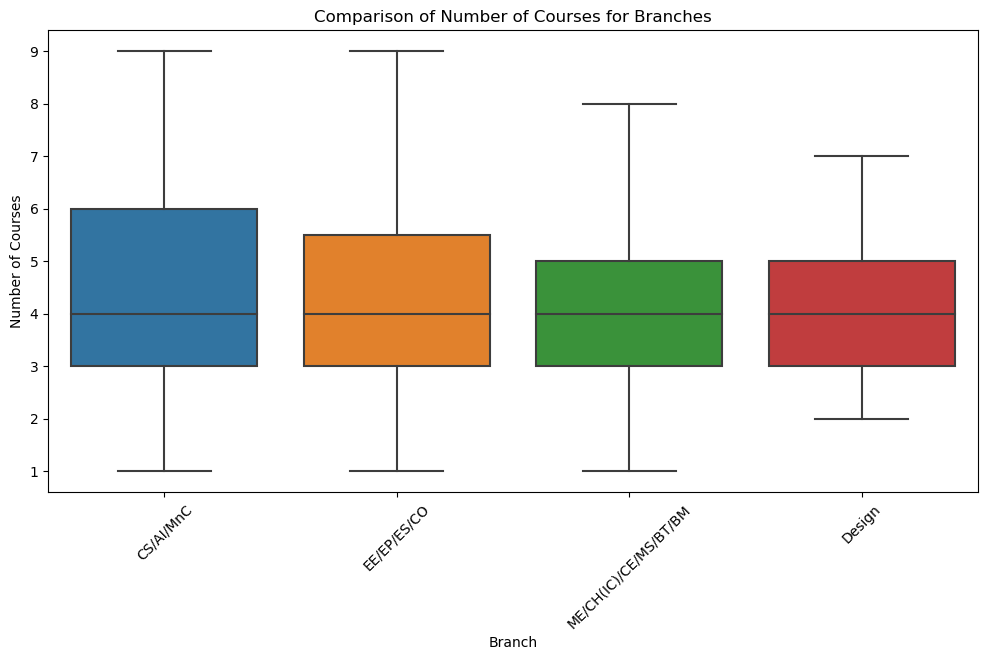

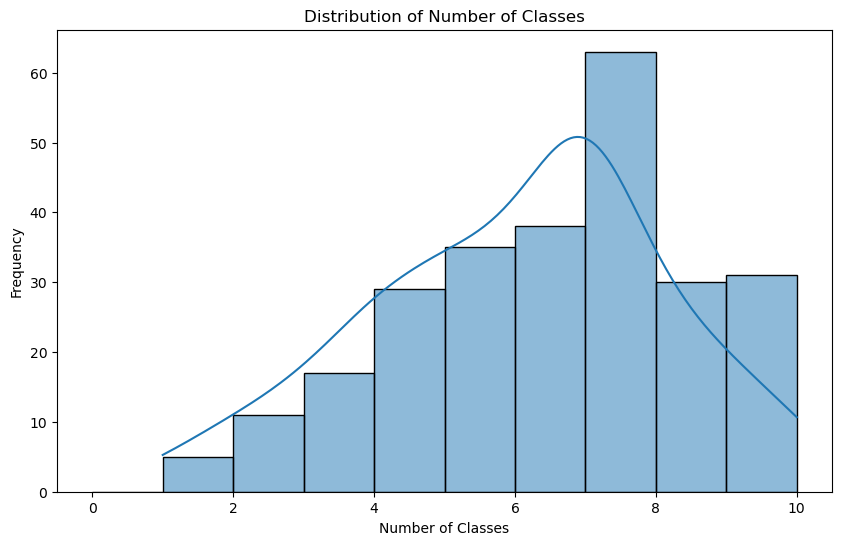

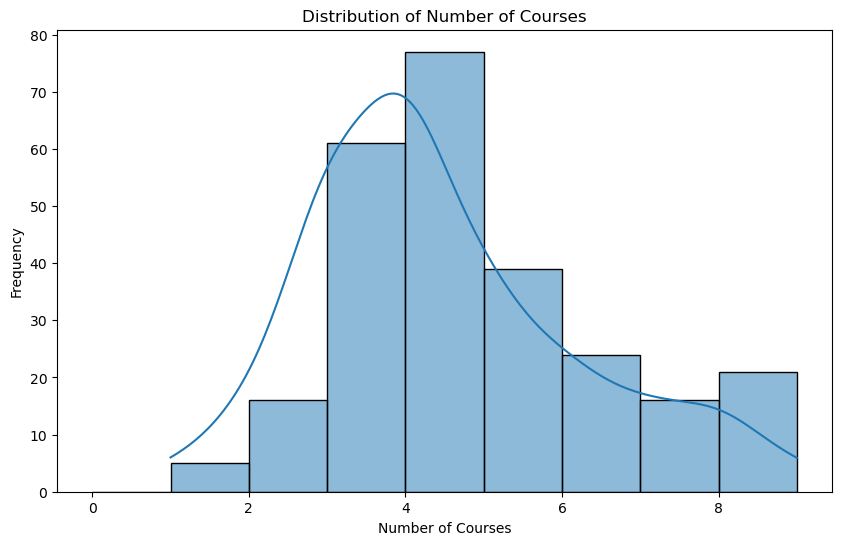

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data2 = pd.read_csv('Modified_Response.csv')
data2['What is your current CGPA? (ex. 7.73)'] = data2['What is your current CGPA? (ex. 7.73)'].astype(float)

# Plot histogram with KDE curve
plt.figure(figsize=(10, 6))
sns.histplot(data2['What is your current CGPA? (ex. 7.73)'], bins=7, kde=True, color='skyblue', edgecolor='black')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.title('Distribution of CGPA')
plt.grid(True)
plt.show()

# b) Box plots to compare the number of classes for B.Tech and M.Tech
plt.figure(figsize=(10, 6))
sns.boxplot(x='Programme', y='No of Classes', data=data2)
plt.xlabel('Programme')
plt.ylabel('Number of Classes')
plt.title('Comparison of Number of Classes for B.Tech and M.Tech')
plt.show()

# c) Box plot to compare the number of courses for branches
plt.figure(figsize=(12, 6))
sns.boxplot(x='Branch', y='No.of Courses', data=data2)
plt.xlabel('Branch')
plt.ylabel('Number of Courses')
plt.title('Comparison of Number of Courses for Branches')
plt.xticks(rotation=45)
plt.show()

# d) Distribution of number of classes
plt.figure(figsize=(10, 6))
sns.histplot(data2['No of Classes'], bins=range(0, max(data2['No of Classes'])+1), kde=True)
plt.xlabel('Number of Classes')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Classes')
plt.show()

# e) Distribution of number of courses
plt.figure(figsize=(10, 6))
sns.histplot(data2['No.of Courses'], bins=range(0, max(data2['No.of Courses'])+1), kde=True)
plt.xlabel('Number of Courses')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Courses')
plt.show()



## Shapiro - Wilk Test for the number of courses, classes attended by them and CGPA of the students

Shapiro-Wilk Test:
Test Statistic: 0.9641395211219788


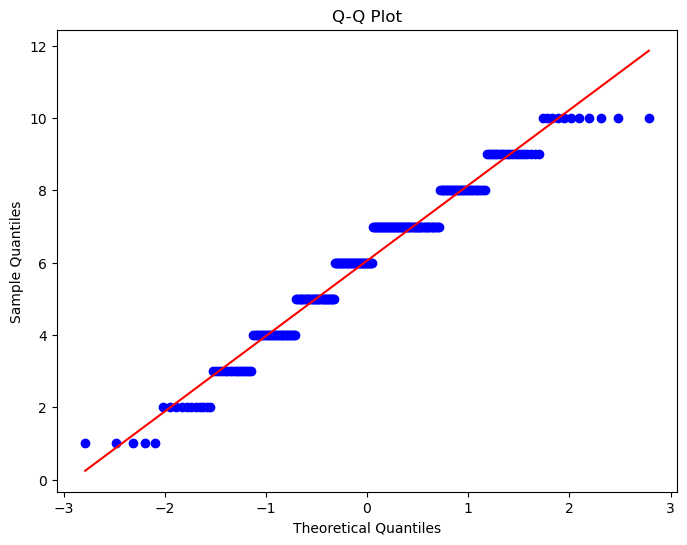


Kolmogorov-Smirnov Test:
Test Statistic: 0.15249682854035318
Shapiro-Wilk Test for No of Courses:
Test Statistic: 0.924164354801178


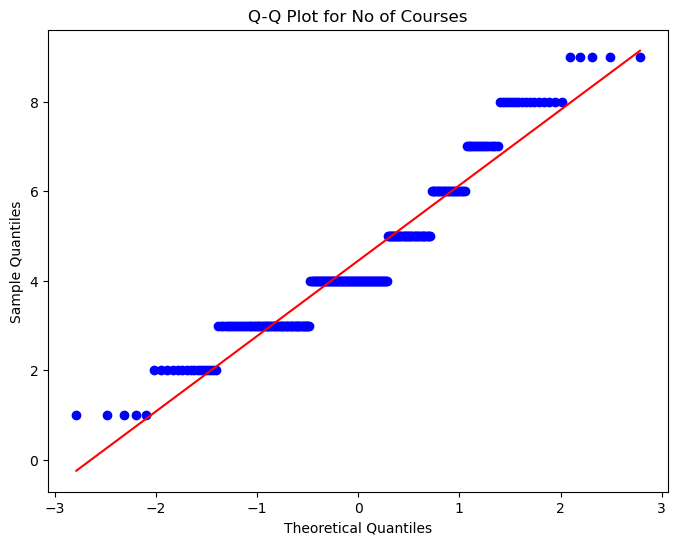


Kolmogorov-Smirnov Test for No of Courses:
Test Statistic: 0.21585345978452597

Shapiro-Wilk Test for CGPA:
Test Statistic: 0.9889493584632874
P-value: 0.045235250145196915


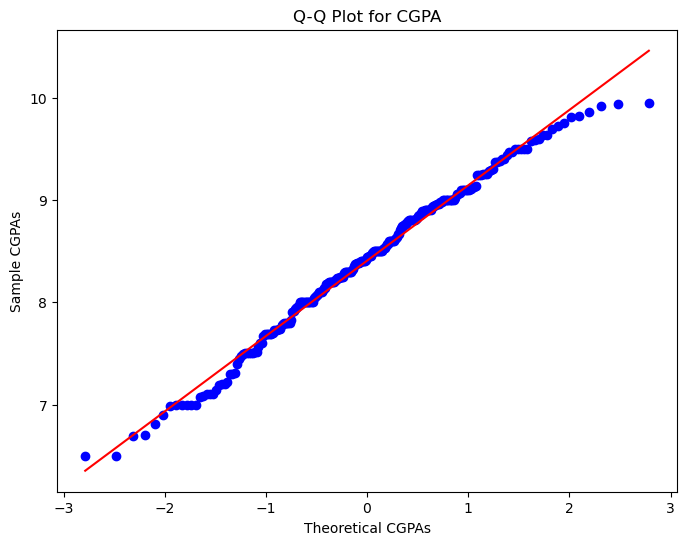


Kolmogorov-Smirnov Test for CGPA:
Test Statistic: 0.04731267830668562
P-value: 0.5910955081794935


In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

no_of_classes = data2['No of Classes']

# Shapiro-Wilk Test
shapiro_test_stat, shapiro_p_value = stats.shapiro(no_of_classes)
print("Shapiro-Wilk Test:")
print(f"Test Statistic: {shapiro_test_stat}")

# Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(no_of_classes, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# Kolmogorov-Smirnov Test
ks_test_stat, ks_p_value = stats.kstest((no_of_classes - np.mean(no_of_classes)) / np.std(no_of_classes), 'norm')
print("\nKolmogorov-Smirnov Test:")
print(f"Test Statistic: {ks_test_stat}")

no_of_courses = data2['No.of Courses']

# Shapiro-Wilk Test for No of Courses
shapiro_test_stat_courses, shapiro_p_value_courses = stats.shapiro(no_of_courses)
print("Shapiro-Wilk Test for No of Courses:")
print(f"Test Statistic: {shapiro_test_stat_courses}")

# Q-Q Plot for No of Courses
plt.figure(figsize=(8, 6))
stats.probplot(no_of_courses, dist="norm", plot=plt)
plt.title('Q-Q Plot for No of Courses')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# Kolmogorov-Smirnov Test for No of Courses
ks_test_stat_courses, ks_p_value_courses = stats.kstest((no_of_courses - np.mean(no_of_courses)) / np.std(no_of_courses), 'norm')
print("\nKolmogorov-Smirnov Test for No of Courses:")
print(f"Test Statistic: {ks_test_stat_courses}")

# Extract the 'What is your current CGPA? (ex. 7.73)' column
cgpa = data2['What is your current CGPA? (ex. 7.73)'].astype(float)

# Shapiro-Wilk Test for CGPA
shapiro_test_stat_cgpa, shapiro_p_value_cgpa = stats.shapiro(cgpa)
print("\nShapiro-Wilk Test for CGPA:")
print(f"Test Statistic: {shapiro_test_stat_cgpa}")
print(f"P-value: {shapiro_p_value_cgpa}")

# Q-Q Plot for CGPA
plt.figure(figsize=(8, 6))
stats.probplot(cgpa, dist="norm", plot=plt)
plt.title('Q-Q Plot for CGPA')
plt.xlabel('Theoretical CGPAs')
plt.ylabel('Sample CGPAs')
plt.show()

# Kolmogorov-Smirnov Test for CGPA
ks_test_stat_cgpa, ks_p_value_cgpa = stats.kstest((cgpa - np.mean(cgpa)) / np.std(cgpa), 'norm')
print("\nKolmogorov-Smirnov Test for CGPA:")
print(f"Test Statistic: {ks_test_stat_cgpa}")
print(f"P-value: {ks_p_value_cgpa}")


## Segmented Bar Graph for attendance frequency by year

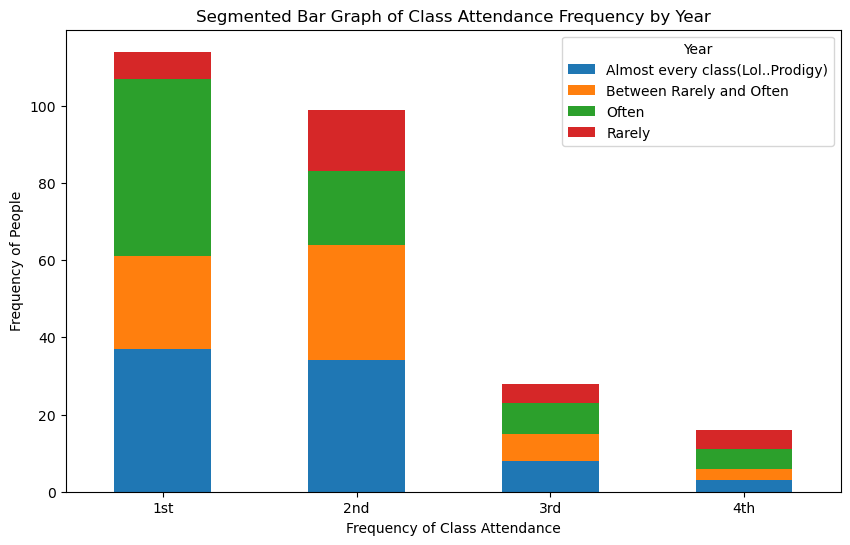

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
data = pd.read_csv("Modified_Response.csv")

# Group the data by 'year' and 'How frequently do you attend classes?' and calculate the frequency
filtered_data = data[data['year'] != '4+']

# Group the filtered data by 'year' and 'How frequently do you attend classes?' and calculate the frequency
grouped_data = filtered_data.groupby(['year', 'How frequently do you attend classes?']).size().unstack(fill_value=0)

# Plot the segmented bar graph
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Segmented Bar Graph of Class Attendance Frequency by Year')
plt.xlabel('Frequency of Class Attendance')
plt.ylabel('Frequency of People')
plt.xticks(rotation=0)
plt.legend(title='Year')
plt.show()

